
Round 1/10: Starting...

Updating client 0...
Average loss: 0.4359, Accuracy: 83.90%

Updating client 1...
Average loss: 0.4210, Accuracy: 83.90%

Updating client 2...
Average loss: 0.4403, Accuracy: 83.90%

Updating client 3...
Average loss: 0.5190, Accuracy: 83.90%

Updating client 4...
Average loss: 0.4152, Accuracy: 83.90%

Updating client 5...
Average loss: 0.4808, Accuracy: 83.90%

Updating client 6...
Average loss: 0.4033, Accuracy: 83.90%

Updating client 7...
Average loss: 0.4325, Accuracy: 83.90%

Updating client 8...
Average loss: 0.4065, Accuracy: 83.90%

Updating client 9...
Average loss: 0.4048, Accuracy: 83.90%
Test Accuracy: 83.90%
Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Confusion Matrix:
[[198   0]
 [ 38   0]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


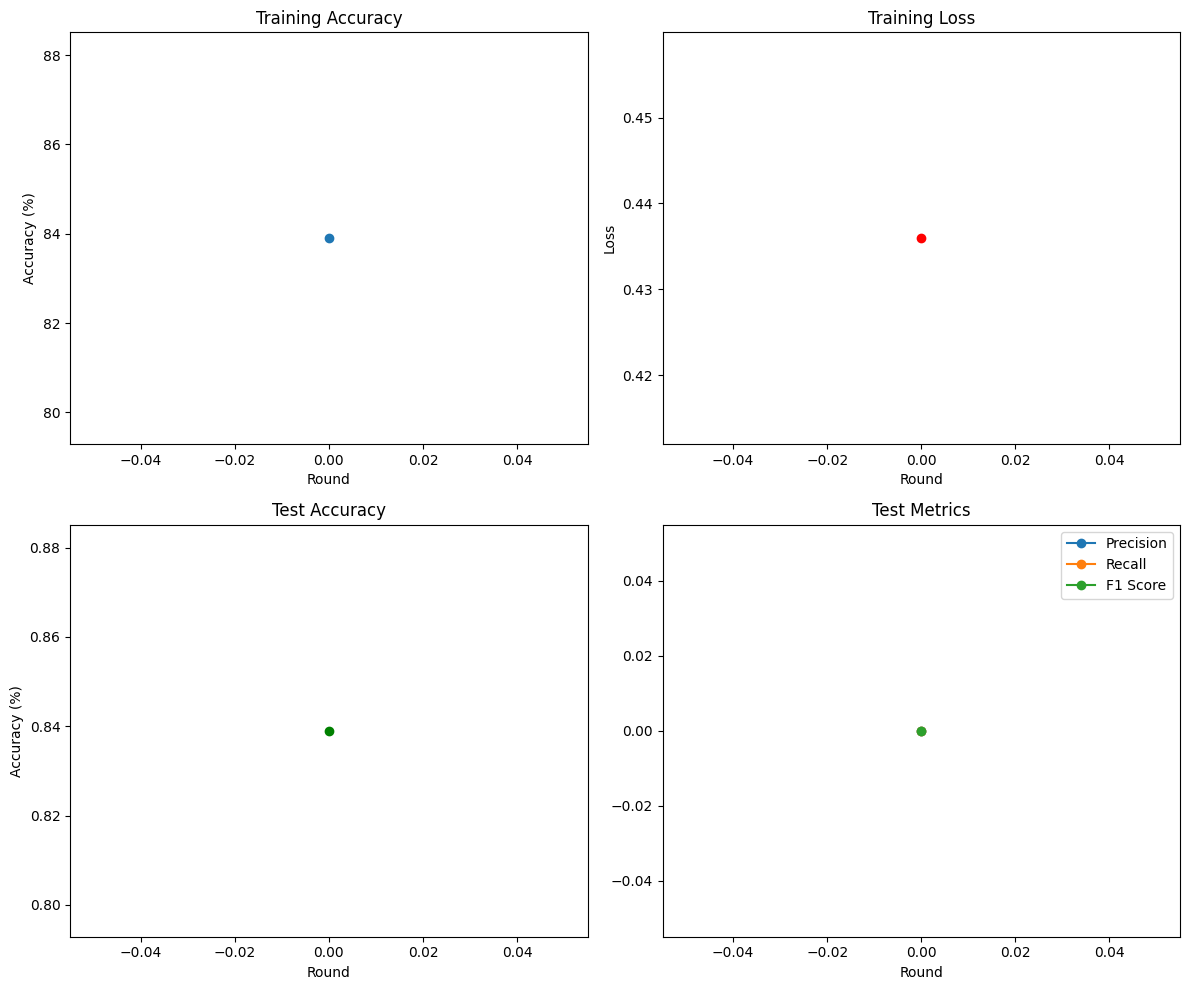


Round 2/10: Starting...

Updating client 0...
Average loss: 0.4377, Accuracy: 83.90%

Updating client 1...
Average loss: 0.4082, Accuracy: 83.90%

Updating client 2...
Average loss: 0.4333, Accuracy: 83.90%

Updating client 3...
Average loss: 0.4810, Accuracy: 83.90%

Updating client 4...
Average loss: 0.3940, Accuracy: 83.90%

Updating client 5...
Average loss: 0.4010, Accuracy: 83.90%

Updating client 6...
Average loss: 0.4165, Accuracy: 83.90%

Updating client 7...
Average loss: 0.4054, Accuracy: 83.90%

Updating client 8...
Average loss: 0.4079, Accuracy: 83.90%

Updating client 9...
Average loss: 0.4005, Accuracy: 83.90%
Test Accuracy: 83.90%
Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Confusion Matrix:
[[198   0]
 [ 38   0]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


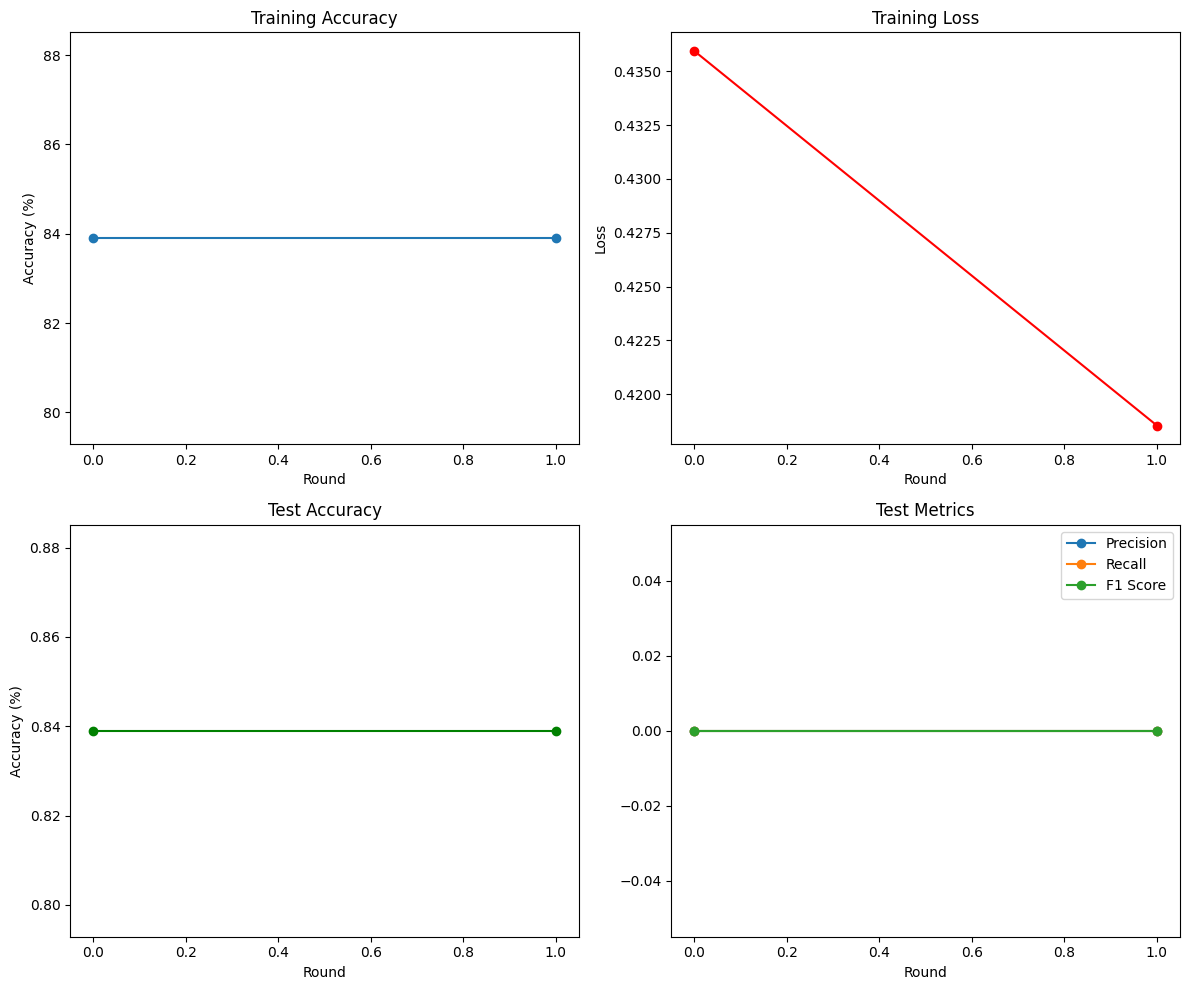


Round 3/10: Starting...

Updating client 0...
Average loss: 0.4345, Accuracy: 83.90%

Updating client 1...
Average loss: 0.4398, Accuracy: 83.90%

Updating client 2...
Average loss: 0.3984, Accuracy: 83.90%

Updating client 3...
Average loss: 0.4005, Accuracy: 83.90%

Updating client 4...
Average loss: 0.4085, Accuracy: 83.90%

Updating client 5...
Average loss: 0.4160, Accuracy: 83.90%

Updating client 6...
Average loss: 0.4000, Accuracy: 83.90%

Updating client 7...
Average loss: 0.4072, Accuracy: 83.90%

Updating client 8...
Average loss: 0.4012, Accuracy: 83.90%

Updating client 9...


KeyboardInterrupt: 

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class AdvancedNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate=0.5):
        super(AdvancedNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

class AdvancedCustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

class AdvancedServer:
    def __init__(self, clients, global_model, num_rounds):
        self.clients = clients
        self.global_model = global_model
        self.num_rounds = num_rounds
        self.round = 0
        self.device = None
        self.history = {"train_acc": [], "train_loss": [], "test_acc": [], "precision": [], "recall": [], "f1_score": []}

    def setup(self, args):
        self.num_clients = args["num_clients"]
        self.num_rounds = args["num_rounds"]
        self.local_epochs = args["local_epochs"]
        self.batch_size = args["batch_size"]
        self.device = args.get("device", 'cuda' if torch.cuda.is_available() else 'cpu')

    def federated_learning(self):
        for round in range(self.num_rounds):
            self.round = round + 1
            print(f"\nRound {self.round}/{self.num_rounds}: Starting...")
            acc_train_clients, loss_train_clients = self.train_global_model()
            self.history["train_acc"].append(100 * sum(acc_train_clients) / len(acc_train_clients))
            self.history["train_loss"].append(sum(loss_train_clients) / len(loss_train_clients))

            acc_test, precision, recall, f1 = self.evaluate_global_model()
            self.history["test_acc"].append(acc_test)
            self.history["precision"].append(precision)
            self.history["recall"].append(recall)
            self.history["f1_score"].append(f1)

            self.plot_progress()

    def train_global_model(self):
        acc_train_clients = []
        loss_train_clients = []

        for id, client in enumerate(self.clients):
            print(f"\nUpdating client {id}...")
            local_model, loss_train_client = client.client_update(self.global_model)
            self.global_model.load_state_dict(local_model)
            acc_train, loss_train = client.evaluate(self.global_model)
            acc_train_clients.append(acc_train)
            loss_train_clients.append(loss_train)

        return acc_train_clients, loss_train_clients

    def evaluate_global_model(self):
        self.global_model.eval()
        self.global_model.to(self.device)
        test_loader = self.clients[0].test_loader  # Assuming all clients have the same test data

        test_loss, correct = 0, 0
        all_predictions, all_labels = [], []

        with torch.no_grad():
            for data, labels in test_loader:
                data, labels = data.to(self.device), labels.to(self.device)
                outputs = self.global_model(data)
                test_loss += F.nll_loss(outputs, labels, reduction='sum').item()
                predicted = outputs.argmax(dim=1, keepdim=True)
                correct += predicted.eq(labels.data.view_as(predicted)).long().cpu().sum()

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        test_loss /= len(test_loader.dataset)
        test_accuracy = correct / len(test_loader.dataset)

        precision = precision_score(all_labels, all_predictions)
        recall = recall_score(all_labels, all_predictions)
        f1 = f1_score(all_labels, all_predictions)

        print(f"Test Accuracy: {100. * test_accuracy:.2f}%")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        
        confusion_mat = confusion_matrix(all_labels, all_predictions)
        print("Confusion Matrix:")
        print(confusion_mat)

        return test_accuracy, precision, recall, f1

    def plot_progress(self):
        
        plt.figure(figsize=(12, 10))
        plt.subplot(2, 2, 1)
        plt.plot(self.history["train_acc"], marker='o')
        plt.title('Training Accuracy')
        plt.xlabel('Round')
        plt.ylabel('Accuracy (%)')

        plt.subplot(2, 2, 2)
        plt.plot(self.history["train_loss"], marker='o', color='r')
        plt.title('Training Loss')
        plt.xlabel('Round')
        plt.ylabel('Loss')

        
        plt.subplot(2, 2, 3)
        plt.plot(self.history["test_acc"], marker='o', color='g')
        plt.title('Test Accuracy')
        plt.xlabel('Round')
        plt.ylabel('Accuracy (%)')

        plt.subplot(2, 2, 4)
        plt.plot(self.history["precision"], marker='o', label='Precision')
        plt.plot(self.history["recall"], marker='o', label='Recall')
        plt.plot(self.history["f1_score"], marker='o', label='F1 Score')
        plt.title('Test Metrics')
        plt.xlabel('Round')
        plt.legend()

        plt.tight_layout()
        plt.show()

class AdvancedClient:
    def __init__(self, model, train_loader, test_loader, device, local_epochs, learning_rate=0.01):
        self.model = model
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.device = device
        self.local_epochs = local_epochs
        self.learning_rate = learning_rate

    def client_update(self, global_model):
        self.model.train()
        self.model.to(self.device)

        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        epoch_loss = []

        for epoch in range(self.local_epochs):
            batch_loss = []

            for batch_idx, (data, labels) in enumerate(self.train_loader):
                data, labels = data.to(self.device), labels.long().to(self.device)

                global_model.to(self.device)
                global_model.eval()
                global_outputs = global_model(data)
                global_loss = F.nll_loss(global_outputs, labels)

                self.model.zero_grad()
                outputs = self.model(data)
                loss = F.nll_loss(outputs, labels) + global_loss

                loss.backward()
                optimizer.step()

                batch_loss.append(loss.item())

            epoch_loss.append(sum(batch_loss) / len(batch_loss))

        return self.model.state_dict(), sum(epoch_loss) / len(epoch_loss)

    def evaluate(self, model):
        model.eval()
        model.to(self.device)
        test_loss, correct = 0, 0

        with torch.no_grad():
            for data, labels in self.test_loader:
                data, labels = data.to(self.device), labels.to(self.device)
                outputs = model(data)
                test_loss += F.nll_loss(outputs, labels, reduction='sum').item()
                predicted = outputs.argmax(dim=1, keepdim=True)
                correct += predicted.eq(labels.data.view_as(predicted)).long().cpu().sum()

        test_loss /= len(self.test_loader.dataset)
        test_accuracy = correct / len(self.test_loader.dataset)

        print(f"Average loss: {test_loss:.4f}, Accuracy: {100. * test_accuracy:.2f}%")

        return test_accuracy, test_loss

df = pd.read_csv('/Users/kaifrehmankhan/Desktop/LFL/Dataset.csv')

imputer = KNNImputer(n_neighbors=5)  # You can adjust the value of n_neighbors as needed
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

columns_to_drop = ['group', 'ID', 'gendera']
df_imputed = df_imputed.drop(columns=columns_to_drop)

df_imputed['outcome'] = df_imputed['outcome'].astype(int)

X_imputed = df_imputed.drop(columns=['outcome'])
y_imputed = df_imputed['outcome']

X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

num_clients = 10
num_rounds = 10
local_epochs = 10
batch_size = 32

input_size_imputed = len(X_imputed.columns)
hidden_size1_imputed = 256 
hidden_size2_imputed = 128 
output_size_imputed = 2

client_datasets = []
for i in range(num_clients):
    X_client, _, y_client, _ = train_test_split(X_train_imputed, y_train_imputed, test_size=1/num_clients, random_state=i)
    train_dataset = AdvancedCustomDataset(features=X_client, labels=y_client)
    test_dataset = AdvancedCustomDataset(features=X_test_imputed, labels=y_test_imputed)
    client_datasets.append((train_dataset, test_dataset))

advanced_global_model_imputed = AdvancedNet(input_size_imputed, hidden_size1_imputed, hidden_size2_imputed, output_size_imputed)
advanced_clients_imputed = [
    AdvancedClient(AdvancedNet(input_size_imputed, hidden_size1_imputed, hidden_size2_imputed, output_size_imputed),
                   DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
                   DataLoader(test_dataset, batch_size=batch_size, shuffle=False),
                   'cpu', local_epochs)
    for train_dataset, test_dataset in client_datasets
]

advanced_server_imputed = AdvancedServer(advanced_clients_imputed, advanced_global_model_imputed, num_rounds)

advanced_server_imputed.setup(args={"num_clients": num_clients, "num_rounds": num_rounds, "local_epochs": local_epochs, "batch_size": batch_size, "device": 'cpu'})
advanced_server_imputed.federated_learning()
